# Lectura y escritura de ficheros de tipo CSV

Mediante Numpy principalmente se leen y escribir ficheros numéricos o de tipo CSV. También permite leer ficheros que tengan texto.



## Activando Google Drive de forma local


En este apartado veremos cómo montar Google Drive en tu entorno de ejecución con un código de autorización y cómo puedes escribir y leer archivos en ese entorno.

Nota: Si un usuario utiliza el botón Montar Drive en el explorador de archivos, no hará falta ningún código de autenticación en los cuadernos que no haya editado nadie más.

In [1]:
#esto no hace falta, si activamos el Drive en el explorador
# Pide que se active. Envía un mensaje al móvil
#from google.colab import drive
#drive.mount('/content/drive')

### Lectura de un fichero de tipo .csv con cabecera, usando Pandas

In [2]:
import pandas as pd
#fichero .csv cuyos datos están separados por comas. La primera fila indicaa la información que hay por cada columna
file='/content/drive/MyDrive/Ficheros_leer/Temperaturas.csv'
#leemos el fichero complete
dataset = pd.read_csv(file,header=0,sep=';') #indicarmos que la cabecera está en la fila 0. Por defecto, ya es 0

#cabeceras
headers = pd.read_csv(file, header=0,sep=';').columns.tolist()
print("cabeceras= \n", headers)

cabeceras= 
 ['Vigo', 'Santiago', 'Lugo']


In [3]:
print(dataset)

   Vigo  Santiago   Lugo
0  22.0     26.00  24.20
1  24.0     30.00  22.00
2  21.0     23.00  19.30
3  20.0     20.00  20.20
4  20.4     18.00  17.00
5  19.5     18.75  16.75


In [4]:
print(dataset.head()) #muestra las cinco primeras filas

   Vigo  Santiago  Lugo
0  22.0      26.0  24.2
1  24.0      30.0  22.0
2  21.0      23.0  19.3
3  20.0      20.0  20.2
4  20.4      18.0  17.0


#### Indicamos los nombres de las columnas del fichero

In [5]:
print(type(dataset)) #dataset es un DataFrame

cols=['Vigo','Lugo']
dataset = pd.read_csv(file,header=0,sep=';',usecols=cols)
print(dataset)

<class 'pandas.core.frame.DataFrame'>
   Vigo   Lugo
0  22.0  24.20
1  24.0  22.00
2  21.0  19.30
3  20.0  20.20
4  20.4  17.00
5  19.5  16.75


In [6]:
df = pd.DataFrame(dataset)  #de este modo tenemos acceso como si fuese un dicionario
print(df)


   Vigo   Lugo
0  22.0  24.20
1  24.0  22.00
2  21.0  19.30
3  20.0  20.20
4  20.4  17.00
5  19.5  16.75


In [7]:
print("Accedo a la informacion de la columna Vigo")
print(df['Vigo'])

Accedo a la informacion de la columna Vigo
0    22.0
1    24.0
2    21.0
3    20.0
4    20.4
5    19.5
Name: Vigo, dtype: float64


In [8]:
#caluclo de la media
print("Media por ciudades (columnas)= ", df.mean())  #Calcula la media por columnas
print("Media por dias (filas) ", df.mean(axis=1))

Media por ciudades (columnas)=  Vigo    21.150000
Lugo    19.908333
dtype: float64
Media por dias (filas)  0    23.100
1    23.000
2    20.150
3    20.100
4    18.700
5    18.125
dtype: float64


<Axes: >

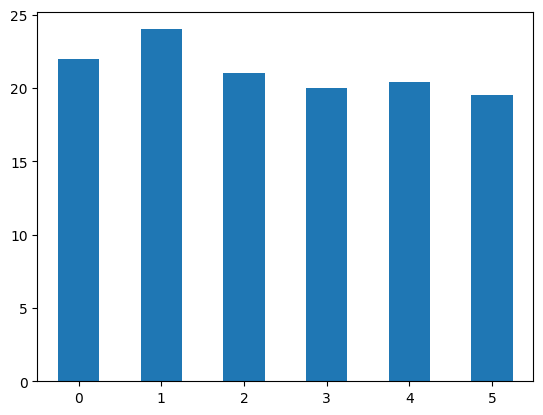

In [9]:
#representacion usando Pandas

df["Vigo"].plot.bar(rot=0)

<Axes: >

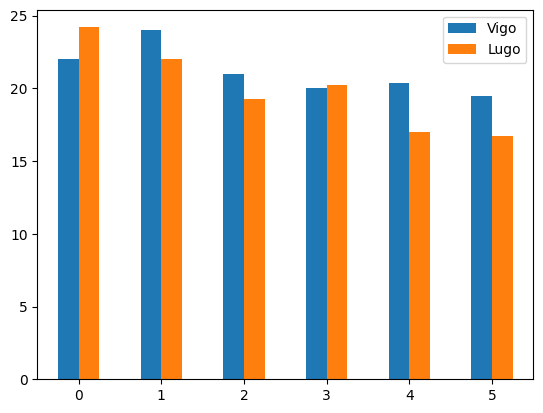

In [10]:
df.plot.bar(rot=0)

In [11]:
import numpy as np
print("Media con numpy = ", np.mean(np.array(df['Vigo'])))
print(np.array(df['Vigo']))

Media con numpy =  21.150000000000002
[22.  24.  21.  20.  20.4 19.5]


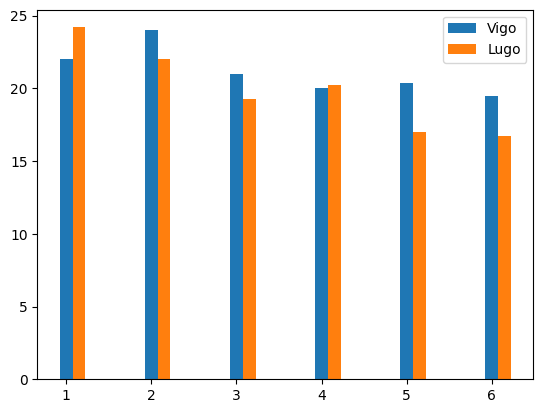

In [32]:
import matplotlib.pyplot as plt

dim=len(df['Vigo'])
x=np.array(range(1,dim+1))
fig, ax = plt.subplots()

n_series=len(df.keys())
width_bar = width_cluster/n_series
n=0
x_positions = x[:]

for k in df:
    ax.bar(x_positions,df[k],width=width_bar,label=k)
    n+=1
    x_positions = x+(width_bar*n)

ax.legend()
plt.show()

# Escribir fichero .csv


Creamos un fichero de tipo .csv que no existía

In [78]:
header=['NIF','Nombre', 'P1', 'P2', 'P3', 'P4']
data=[['22333111a', 'Juan', 9.5,8,5.5, 9],['11333111b', 'Ana', 7.5,5,6.5, 8],['11333222c', 'Antonio', 4.5,5,3.5, 6]]
df=pd.DataFrame(data,columns=header)

In [79]:
file='/content/drive/MyDrive/Ficheros_leer/notas.csv'
outfile = open(file, 'wb')
df.to_csv(outfile,index=False)  #se escribe en el fichero de tipo .csv
outfile.close()

Leemos el fichero que acabamos de crear

In [80]:
outfile = open(file, 'r') #lectura
df = pd.read_csv(outfile)
print(df)

outfile.close()


         NIF   Nombre   P1  P2   P3  P4
0  22333111a     Juan  9.5   8  5.5   9
1  11333111b      Ana  7.5   5  6.5   8
2  11333222c  Antonio  4.5   5  3.5   6


Añadimos nuevos elementos en el fichero de tipo .csv


In [81]:
outfile = open(file, 'a') #append
data={
    'NIF':['55333111a','22888111b'],
    'Nombre':['Alex','Estela'],
    'P1': [2.3,7],
    'P2':[10,9.5],
    'P3': [6.5,4.5],
    'P4':[3.2,6.2]
}
df=pd.DataFrame(data)
print(df)
df.to_csv(outfile,mode='a', index=False,header=False) #append
outfile.close()


         NIF  Nombre   P1    P2   P3   P4
0  55333111a    Alex  2.3  10.0  6.5  3.2
1  22888111b  Estela  7.0   9.5  4.5  6.2


In [ ]:
#